In [8]:
import pandas as pd

df = pd.read_csv('series.csv')
df.timestamp = pd.to_datetime(df.timestamp)
df.set_index('timestamp', inplace=True)
df.head()

,valor
timestamp,
2020-01-01,4.4
2020-02-01,6.6
2020-03-01,4.4
2020-04-01,9.9
2020-05-01,24.2


## Correlação Total e Parcial

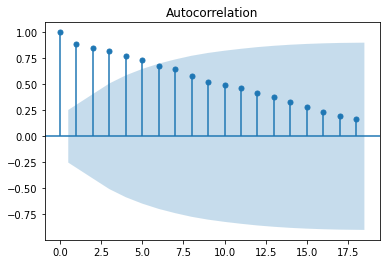

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df.valor)
plt.show()

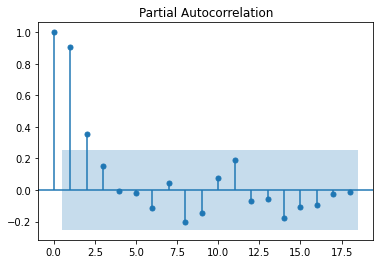

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(df.valor)
plt.show()

## Validação Train/Test

In [13]:
train_size = int(len(df.valor) * 2/3)
train_size

40

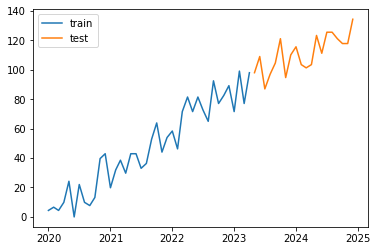

In [21]:
import matplotlib.pyplot as plt
train_set = df.valor[:train_size]
test_set = df.valor[train_size:]
plt.plot(train_set)
plt.plot(test_set)
plt.legend(['train', 'test'])

In [42]:
from statsmodels.tsa.ar_model import AR

ar_2 = AR(train_set, freq='MS').fit(2)
ar_2.params

const       6.617284
L1.valor    0.417002
L2.valor    0.515029
dtype: float64

In [43]:
ar_2.params[0]

6.617283525730783

In [44]:
previsao = ar_2.params[0] + ar_2.params[1] * test_set.shift(1) + ar_2.params[2] * test_set.shift(2)
previsao

timestamp
2023-05-01           NaN
2023-06-01           NaN
2023-07-01    102.450138
2023-08-01     98.941408
2023-09-01     91.739095
2023-10-01    100.048797
2023-11-01    110.895054
2023-12-01    108.384174
2024-01-01    101.209245
2024-02-01    111.434201
2024-03-01    109.221134
2024-04-01    102.071880
2024-05-01    101.856221
2024-06-01    111.245927
2024-07-01    116.397772
2024-08-01    116.129053
2024-09-01    123.493966
2024-10-01    121.659157
2024-11-01    118.016923
2024-12-01    116.317328
Name: valor, dtype: float64

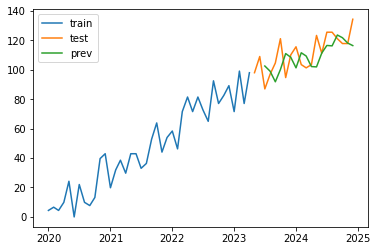

In [36]:
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsao)
plt.legend(['train', 'test', 'prev'])

In [39]:
((test_set - previsao) ** 2).mean()

134.19756639420484

In [41]:
from statsmodels.tsa.ar_model import AR

ar_5 = AR(train_set, freq='MS').fit(5)
ar_5.params

const       7.907520
L1.valor    0.118589
L2.valor    0.098664
L3.valor    0.384341
L4.valor    0.022029
L5.valor    0.368143
dtype: float64

In [45]:
previsao = ar_5.params[0]
for i, coef in enumerate(ar_5.params[1:]):
    previsao += coef * test_set.shift(i + 1)
previsao

timestamp
2023-05-01           NaN
2023-06-01           NaN
2023-07-01           NaN
2023-08-01           NaN
2023-09-01           NaN
2023-10-01    101.690146
2023-11-01    111.776475
2023-12-01    105.352038
2024-01-01    114.729458
2024-02-01    109.952710
2024-03-01    120.472058
2024-04-01    111.751486
2024-05-01    112.935363
2024-06-01    116.413170
2024-07-01    113.274334
2024-08-01    120.624827
2024-09-01    118.631292
2024-10-01    130.628246
2024-11-01    125.663273
2024-12-01    128.911029
Name: valor, dtype: float64

In [46]:
((test_set - previsao) ** 2).mean()

116.1173623365389

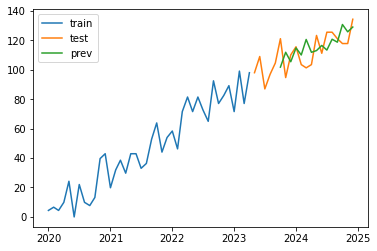

In [47]:
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsao)
plt.legend(['train', 'test', 'prev'])